Design a Skiplist without using any built-in libraries.

A skiplist is a data structure that takes O(log(n)) time to add, erase and search. Comparing with treap and red-black tree which has the same function and performance, the code length of Skiplist can be comparatively short and the idea behind Skiplists is just simple linked lists.

For example, we have a Skiplist containing [30,40,50,60,70,90] and we want to add 80 and 45 into it. The Skiplist works this way:

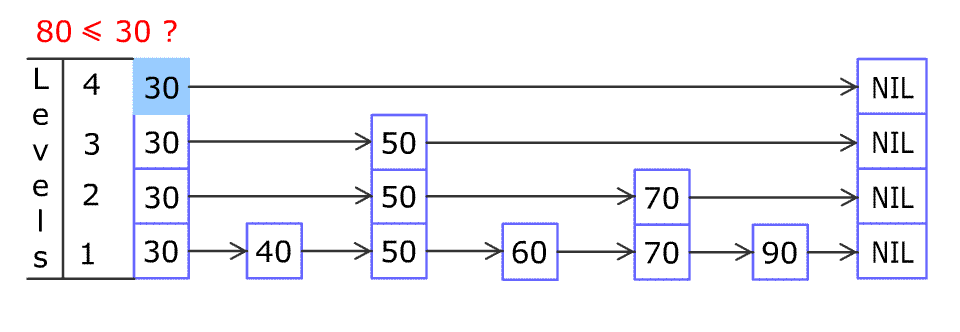

Artyom Kalinin [CC BY-SA 3.0], via Wikimedia Commons

You can see there are many layers in the Skiplist. Each layer is a sorted linked list. With the help of the top layers, add, erase and search can be faster than O(n). It can be proven that the average time complexity for each operation is O(log(n)) and space complexity is O(n).

See more about Skiplist: https://en.wikipedia.org/wiki/Skip_list

Implement the Skiplist class:

    Skiplist() Initializes the object of the skiplist.
    bool search(int target) Returns true if the integer target exists in the Skiplist or false otherwise.
    void add(int num) Inserts the value num into the SkipList.
    bool erase(int num) Removes the value num from the Skiplist and returns true. If num does not exist in the Skiplist, do nothing and return false. If there exist multiple num values, removing any one of them is fine.

Note that duplicates may exist in the Skiplist, your code needs to handle this situation.

 

Example 1:

Input
["Skiplist", "add", "add", "add", "search", "add", "search", "erase", "erase", "search"]
[[], [1], [2], [3], [0], [4], [1], [0], [1], [1]]
Output
[null, null, null, null, false, null, true, false, true, false]

Explanation
Skiplist skiplist = new Skiplist();
skiplist.add(1);
skiplist.add(2);
skiplist.add(3);
skiplist.search(0); // return False
skiplist.add(4);
skiplist.search(1); // return True
skiplist.erase(0);  // return False, 0 is not in skiplist.
skiplist.erase(1);  // return True
skiplist.search(1); // return False, 1 has already been erased.

 

Constraints:

    0 <= num, target <= 2 * 104
    At most 5 * 104 calls will be made to search, add, and erase.



In [ ]:
from random import random
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.down = None
        
class Skiplist:
    def __init__(self):
        self.MAXLEVEL = 32
        self.levels = [Node(float('-inf')) for i in range(self.MAXLEVEL)]
        for i in range(self.MAXLEVEL - 1):
            self.levels[i].down = self.levels[i + 1]
    
    def _iter(self, val):
        res = []
        l = self.levels[0]
        while l:
            while l.next and l.next.val < val:
                l = l.next
            res.append(l)
            l = l.down
        return res
    
    def search(self, target: int) -> bool:
        last = self._iter(target)[-1]
        return last.next and last.next.val == target

    def add(self, num: int) -> None:
        res = self._iter(num)
        prev = None
        for i in range(self.MAXLEVEL - 1, -1, -1):
            node = Node(num)
            node.next, node.down = res[i].next, prev
            res[i].next = node
            prev = node
            rand = random()
            if rand < 0.5:
                break

    def erase(self, num: int) -> bool:
        res = self._iter(num)
        for i in range(self.MAXLEVEL):
            if res[i].next and res[i].next.val == num:
                res[i].next = res[i].next.next
                if i == self.MAXLEVEL - 1: 
                    return True
        return False
        


# Your Skiplist object will be instantiated and called as such:
# obj = Skiplist()
# param_1 = obj.search(target)
# obj.add(num)
# param_3 = obj.erase(nu)m